In [4]:
!pip install textblob 

In [8]:
import os
import pickle
import textblob
import warnings
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [9]:
warnings.simplefilter("ignore")
sns.set()

IEA-EV-dataEV_salesHistoricalCars.csv

In [11]:
df = pd.read_csv("IEA-EV-dataEV_salesHistoricalCars.csv")

In [12]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [14]:
df.isna().sum().sum()

0

In [15]:
df.region.unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Denmark', 'EU27', 'Europe', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Israel', 'Italy',
       'Japan', 'Korea', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Other Europe', 'Poland', 'Portugal', 'Rest of the world',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'USA', 'World'], dtype=object)

In [16]:
df1 = df[df.region == 'India'].reset_index(drop=True)
df1

,region,category,parameter,mode,powertrain,year,unit,value
0,India,Historical,EV sales share,Cars,EV,2010,percent,0.021000
1,India,Historical,EV stock,Cars,BEV,2010,Vehicles,880.000000
2,India,Historical,EV sales,Cars,BEV,2010,Vehicles,450.000000
3,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000016
4,India,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",0.910000
...,...,...,...,...,...,...,...,...
85,India,Historical,EV stock,Cars,BEV,2022,Vehicles,72000.000000
86,India,Historical,Oil displacement Mbd,Cars,EV,2022,Milion barrels per day,0.001000
87,India,Historical,"Oil displacement, million lge",Cars,EV,2022,"Oil displacement, million lge",57.000000
88,India,Historical,EV stock share,Cars,EV,2022,percent,0.160000


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      90 non-null     object 
 1   category    90 non-null     object 
 2   parameter   90 non-null     object 
 3   mode        90 non-null     object 
 4   powertrain  90 non-null     object 
 5   year        90 non-null     int64  
 6   unit        90 non-null     object 
 7   value       90 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.8+ KB


In [19]:
for i in df1.columns:
    print(f'{i}:\n{df1[i].unique()}')

region:
['India']
category:
['Historical']
parameter:
['EV sales share' 'EV stock' 'EV sales' 'Oil displacement Mbd'
 'Oil displacement, million lge' 'EV stock share' 'Electricity demand']
mode:
['Cars']
powertrain:
['EV' 'BEV' 'PHEV']
year:
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
unit:
['percent' 'Vehicles' 'Milion barrels per day'
 'Oil displacement, million lge' 'GWh']
value:
[2.09999997e-02 8.80000000e+02 4.50000000e+02 1.60000000e-05
 9.10000026e-01 5.20000001e-03 7.00000022e-03 3.09999996e-05
 1.79999995e+00 1.30000000e+03 1.40000000e+03 5.60000017e-02
 7.19999988e-03 1.90000000e+02 2.80000000e+03 3.19999999e-05
 1.89999998e+00 1.30000003e-02 1.20000001e-02 3.70000016e-05
 2.09999990e+00 2.90000000e+03 4.10000000e+02 1.60000008e-02
 3.79999988e-02 1.00000000e+03 3.40000000e+03 4.99999987e-05
 2.90000010e+00 1.49999997e-02 5.90000018e-05 3.40000010e+00
 4.40000000e+03 1.70000009e-02 2.60000005e-02 7.30000000e+02
 4.80000000e+03 6.80000012e-05 3.90000010e

In [21]:
df1.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [22]:
df1_1 = df1[['parameter', 'powertrain', 
               'year', 'unit', 'value']]
df1_1

,parameter,powertrain,year,unit,value
0,EV sales share,EV,2010,percent,0.021000
1,EV stock,BEV,2010,Vehicles,880.000000
2,EV sales,BEV,2010,Vehicles,450.000000
3,Oil displacement Mbd,EV,2010,Milion barrels per day,0.000016
4,"Oil displacement, million lge",EV,2010,"Oil displacement, million lge",0.910000
...,...,...,...,...,...
85,EV stock,BEV,2022,Vehicles,72000.000000
86,Oil displacement Mbd,EV,2022,Milion barrels per day,0.001000
87,"Oil displacement, million lge",EV,2022,"Oil displacement, million lge",57.000000
88,EV stock share,EV,2022,percent,0.160000


In [23]:
df1_2 = df1_1[['parameter', 'year', 'value']].groupby(['parameter', 'year']).sum()
df1_2

value
parameter                     year        
EV sales                      2010   450.0
                              2011  1400.0
                              2012   190.0
                              2013   410.0
                              2014  1000.0
...                                    ...
Oil displacement, million lge 2018     5.3
                              2019     5.8
                              2020     7.7
                              2021    18.0
                              2022    57.0

[82 rows x 1 columns]

In [24]:
df1_1.parameter.unique()

array(['EV sales share', 'EV stock', 'EV sales', 'Oil displacement Mbd',
       'Oil displacement, million lge', 'EV stock share',
       'Electricity demand'], dtype=object)

In [25]:
df1_2.loc['EV sales share']

,value
year,
2010,0.0210
2011,0.0560
2012,0.0072
2013,0.0160
2014,0.0380
2015,0.0170
2016,0.0260
2017,0.0310
2018,0.0300


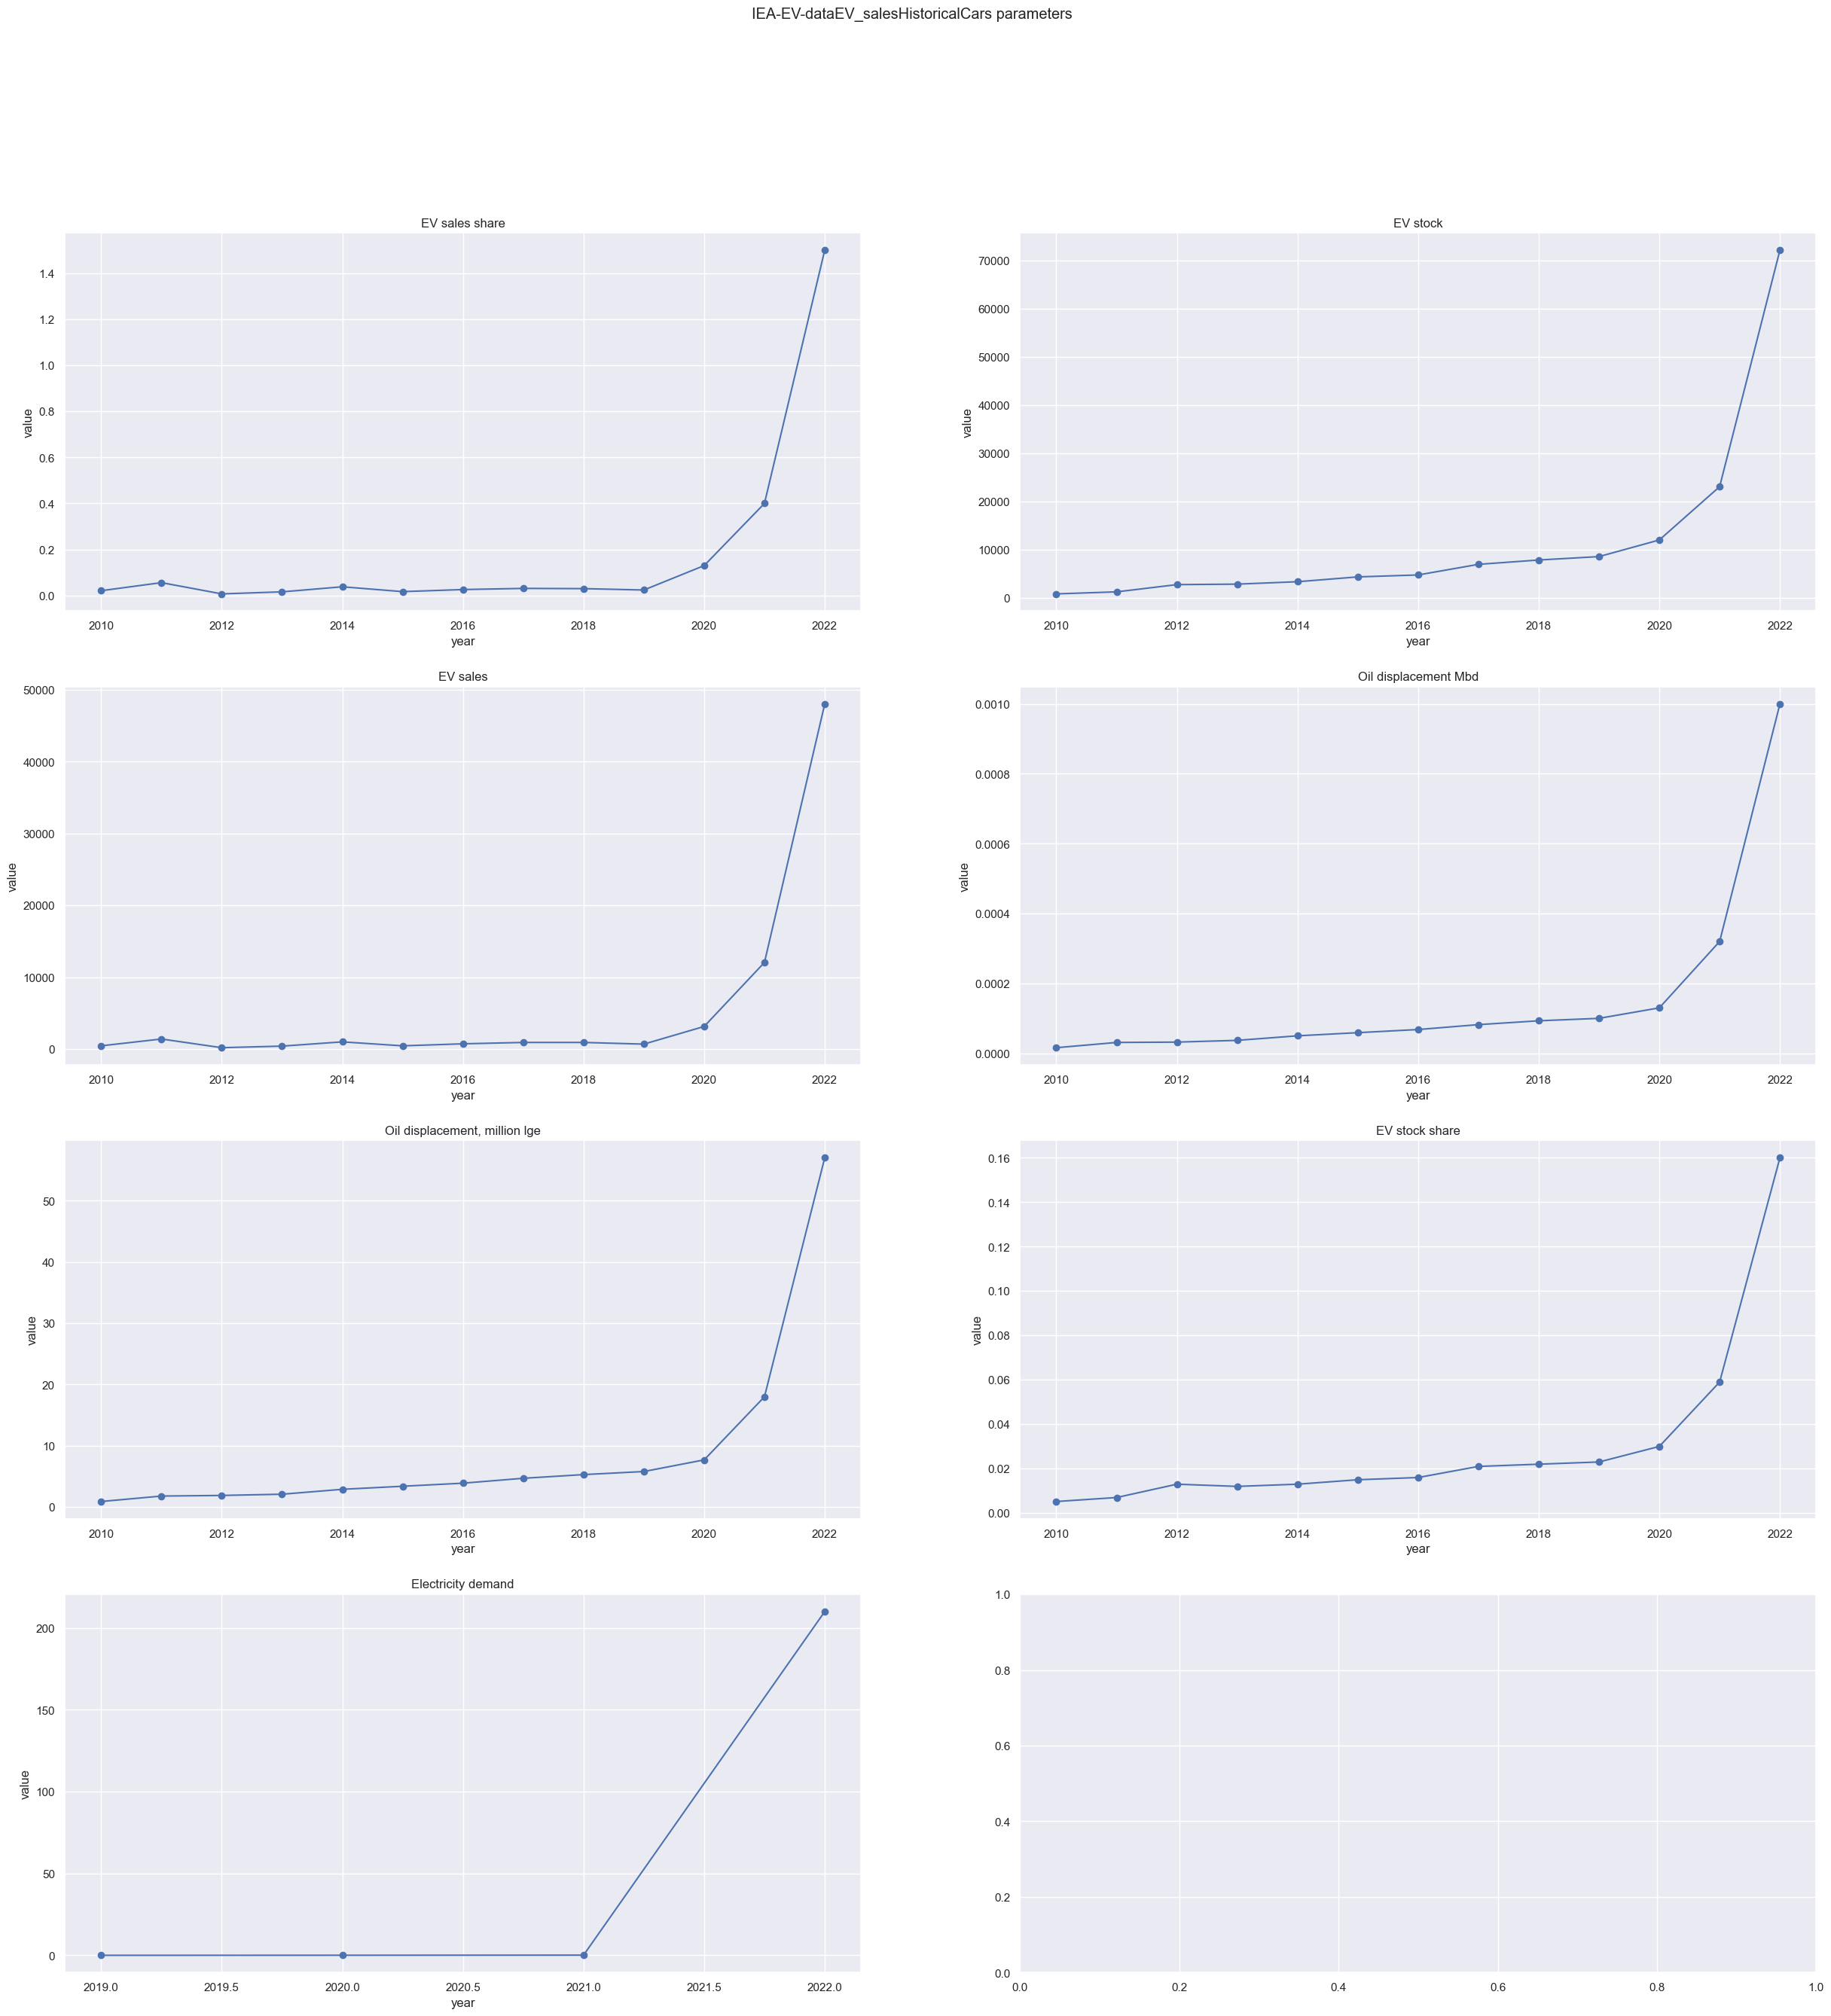

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(30, 30))
axs = axs.flatten()
parameters = df1_1.parameter.unique()
for ax, parameter in zip(axs, parameters):
    temp = df1_2.loc[parameter]
    ax.plot(temp.index, temp.value, '-o')
    ax.set_title(parameter)
    ax.set_xlabel('year')
    ax.set_ylabel('value')
plt.suptitle('IEA-EV-dataEV_salesHistoricalCars parameters')
plt.show()

#### From 2020, EV market become more popular
#### EV usage is raising exponentially
#### So next few years EV demand becomes more high

In [27]:
df1_3 = df1_1[['powertrain', 'year', 'value']].groupby(['powertrain', 'year']).sum()
df1_3

value
powertrain year               
BEV        2010    1330.000000
           2011    2700.000000
           2012    2990.000000
           2013    3310.000000
           2014    4400.000000
           2015    4850.000000
           2016    5530.000000
           2017    7920.000000
           2018    8820.000000
           2019    9280.000000
           2020   15100.000000
           2021   35000.000000
           2022  120000.000000
EV         2010       0.936216
           2011       1.863031
           2012       1.920232
           2013       2.128037
           2014       2.951050
           2015       3.432059
           2016       3.942068
           2017       4.752082
           2018       5.352093
           2019       5.855300
           2020       7.911130
           2021      18.579320
           2022     268.661000
PHEV       2019      14.000000
           2020      93.000000
           2021     150.000000
           2022     143.000000

In [28]:
df1_1.powertrain.unique()

array(['EV', 'BEV', 'PHEV'], dtype=object)

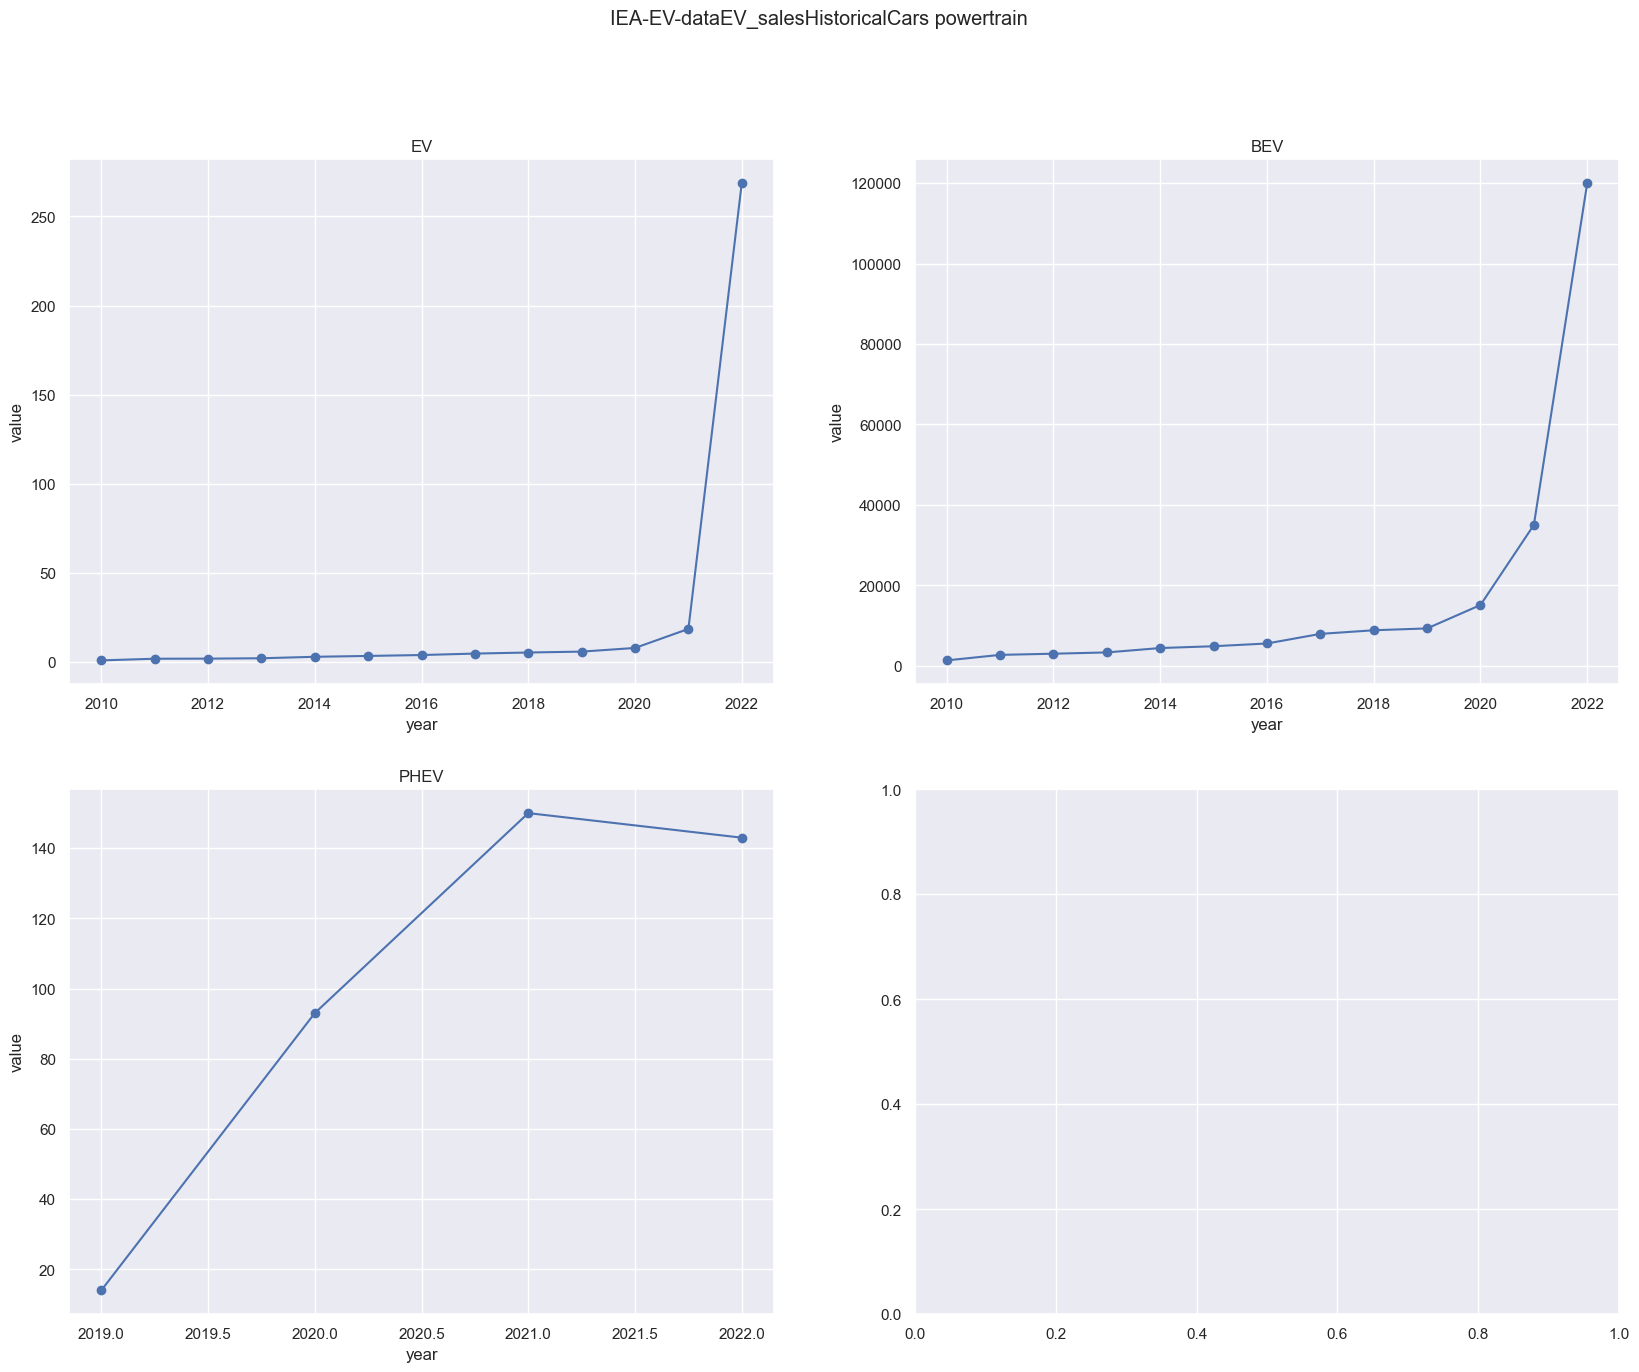

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.flatten()
powertrains = df1_1.powertrain.unique()
for ax, powertrain in zip(axs, powertrains):
    temp = df1_3.loc[powertrain]
    ax.plot(temp.index, temp.value, '-o')
    ax.set_title(powertrain)
    ax.set_xlabel('year')
    ax.set_ylabel('value')
plt.suptitle('IEA-EV-dataEV_salesHistoricalCars powertrain')
plt.show()

#### Plug-in hybrid: graph decreasing
#### Battery Electric Vehicle: graph increasing
#### So Battery Electric Vehicle become so popular and demand in future.

#### PCA

In [30]:
df1_1.head(3)

,parameter,powertrain,year,unit,value
0,EV sales share,EV,2010,percent,0.021
1,EV stock,BEV,2010,Vehicles,880.000
2,EV sales,BEV,2010,Vehicles,450.000


In [31]:
label_encoders = [LabelEncoder() for _ in range(5)]

df1_4 = df1_1

for le, column in zip(label_encoders, df1_4.columns):
    df1_4[column] = le.fit_transform(df1_4[column])

standard_scaler = StandardScaler()

df1_4 = standard_scaler.fit_transform(df1_4)
df1_4[:5]

array([[-0.82939897,  0.3441236 , -1.72493763,  1.10633195, -0.79151715],
       [-0.34781247, -1.3764944 , -1.72493763,  0.24050695,  0.97967648],
       [-1.31098547, -1.3764944 , -1.72493763,  0.24050695,  0.85007694],
       [ 1.09694702,  0.3441236 , -1.72493763, -1.49114306, -1.74191373],
       [ 1.57853352,  0.3441236 , -1.72493763, -0.62531806, -0.14351948]])

In [32]:
pca = PCA(n_components=5)
df1_4_pca = pca.fit_transform(df1_4)
df1_4_pca[:5]

array([[-0.41553146, -1.49569507, -1.7523969 ,  0.14098876,  0.36285047],
       [-1.41256057, -1.82895667,  0.64922413, -0.3126372 ,  0.38611647],
       [-1.90161371, -1.74635176,  0.29787407,  0.38521236,  0.68286696],
       [ 2.37523363, -1.85688826,  0.05582255,  0.55523102,  0.39208201],
       [ 1.42291418, -1.59399548,  0.36340348, -1.00892195,  0.53078013]])

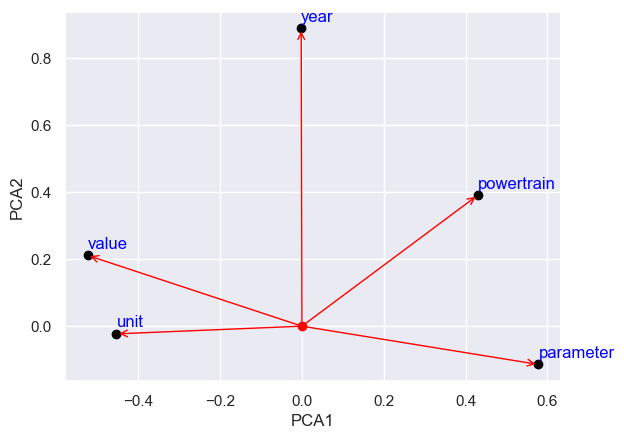

In [33]:
def pca_plot(pca, df, x_axis=0, y_axis=1, scale=1):
    plt.scatter(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, color='black')
    for x,y,name in zip(pca.components_[x_axis]*scale, pca.components_[y_axis]*scale, df.columns):
        plt.text(x, y+0.02, name, color='blue')
        plt.annotate('', (x,y), (0,0), arrowprops=dict(arrowstyle='->', color='red'))
    plt.scatter(0, 0, c='red')
    plt.xlabel(f'PCA{x_axis+1}')
    plt.ylabel(f'PCA{y_axis+1}')
    plt.show()

pca_plot(pca, df1_1)

#### Car Details4.csv

In [34]:
df2 = pd.read_csv("car details v4.csv")

In [36]:
df2.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [37]:
df2.isna().sum().sum()

745

In [38]:
df2 = df2.dropna()

for i in df2.columns:
    print(f'{i}:\n{df2[i].unique()}')

Make:
['Honda' 'Maruti Suzuki' 'Hyundai' 'Toyota' 'BMW' 'Skoda' 'Nissan'
 'Renault' 'Tata' 'Volkswagen' 'Ford' 'Mercedes-Benz' 'Audi' 'Mahindra'
 'MG' 'Jeep' 'Porsche' 'Kia' 'Land Rover' 'Volvo' 'Maserati' 'Jaguar'
 'Isuzu' 'MINI' 'Ferrari' 'Mitsubishi' 'Datsun' 'Chevrolet' 'Ssangyong'
 'Fiat' 'Rolls-Royce' 'Lexus']
Model:
['Amaze 1.2 VX i-VTEC' 'Swift DZire VDI' 'i10 Magna 1.2 Kappa2' 'Glanza G'
 'Innova 2.4 VX 7 STR [2016-2020]' 'Ciaz ZXi' 'X1 xDrive20d M Sport'
 'Octavia 1.8 TSI Style Plus AT [2017]' 'Terrano XL (D)'
 'Elite i20 Sportz 1.2' 'Kwid 1.0 RXT [2016-2019]'
 'Ciaz Alpha Hybrid 1.5 AT [2018-2020]' 'Harrier XZ [2019-2020]'
 'Polo GT TSI' 'Celerio ZXi AMT [2019-2020]' 'Alto 800 LXi (O)'
 'Baleno Alpha Automatic' 'Wagon R ZXi 1.2 AMT' 'Creta 1.6 E Petrol'
 'S-Presso VXi AMT' 'Vento Comfortline Petrol AT'
 'Santro Sportz AMT [2018-2020]' 'Venue SX 1.0 (O) Petrol [2019-2020]'
 'Alto LXi CNG' 'Ritz Zxi BS-IV' 'Creta 1.6 SX Plus Petrol' 'Brio V MT'
 'Elite i20 Asta 1.2' 'WR-V VX M

In [39]:
df2_1 = df2

label_encoders2 = [LabelEncoder() for _ in range(7)]

for column, le in zip(['Fuel Type', 'Transmission', 'Location', 
               'Color', 'Owner', 'Seller Type', 'Drivetrain'], label_encoders2):
    df2_1[column] = le.fit_transform(df2_1[column])
df2_1.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,5,1,56,7,0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,1,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,2,1,40,14,1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,1,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,5,1,39,8,0,2,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,1,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,5,1,41,12,0,2,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,1,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,2,1,45,7,0,2,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,2,4735.0,1830.0,1795.0,7.0,55.0


In [40]:
df2_1.Engine = df2_1.Engine.str.findall('\d+').apply(lambda x:x[0])

In [41]:
df2_1['Max Power'][df2_1['Max Power'].str.findall('[\d\.]+').apply(lambda x:len(x)!=2)]

456     112 bhp @
2014    112 bhp @
Name: Max Power, dtype: object

In [42]:
df2_1 = df2_1.drop([456, 2014])

In [43]:
df2_1['Max Power'] = df2_1['Max Power'].str.findall('[\d\.]+').apply(lambda x:float(x[0])/float(x[1]))

In [44]:
df2_1['Max Torque'][df2_1['Max Torque'].str.findall('[\d\.]+').apply(lambda x:len(x)!=2)]

Series([], Name: Max Torque, dtype: object)

In [45]:
df2_1['Max Torque'] = df2_1['Max Torque'].str.findall('[\d\.]+').apply(lambda x:float(x[0])*float(x[1]))

In [46]:
df2_2 = df2_1.select_dtypes(['int', 'float'])
df2_2.head()

,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,5,1,56,7,0,1,0.014500,490500.0,1,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,2,1,40,14,1,2,0.018500,380000.0,1,3995.0,1695.0,1555.0,5.0,42.0
2,220000,2011,67000,5,1,39,8,0,2,0.013167,451047.6,1,3585.0,1595.0,1550.0,5.0,35.0
3,799000,2019,37500,5,1,41,12,0,2,0.013667,474600.0,1,3995.0,1745.0,1510.0,5.0,37.0
4,1950000,2018,69000,2,1,45,7,0,2,0.043529,480200.0,2,4735.0,1830.0,1795.0,7.0,55.0


In [47]:
df2_2 = df2_2[['Price', 'Year', 'Kilometer', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity']]

In [48]:
standard_scaler2 = StandardScaler()
df2_2_scaled = standard_scaler2.fit_transform(df2_2)
df2_2_scaled[:5]

array([[-0.50011059,  0.09023696,  0.57797468, -0.87218662, -0.1866376 ,
        -0.66860631, -0.66878537, -0.62377504, -0.36597911, -1.13530191],
       [-0.52277499, -0.86593434,  0.37134369, -0.63255151, -0.67775663,
        -0.65714619, -0.55461113, -0.25247093, -0.36597911, -0.67387522],
       [-0.61755339, -1.82210564,  0.23529036, -0.95206499, -0.36198443,
        -1.59687622, -1.31577274, -0.28960134, -0.36597911, -1.13530191],
       [-0.37895906,  0.7276845 , -0.26640627, -0.9221106 , -0.25730541,
        -0.65714619, -0.17403033, -0.58664463, -0.36597911, -1.00346571],
       [ 0.09534503,  0.40896073,  0.26930369,  0.86692993, -0.23241612,
         1.03895192,  0.47295703,  1.52978882,  2.11182519,  0.18306005]])

In [49]:
df2_2_scaled.shape

(1872, 10)

In [50]:
pca2 = PCA(n_components=10)
df2_2_scaled_pca = pca2.fit_transform(df2_2_scaled)
df2_2_scaled_pca[:5]

array([[-1.80222624, -0.21153337,  0.32693569,  0.55056516, -0.14770589,
         0.5183892 ,  0.16688563,  0.25676949, -0.02411584,  0.08014826],
       [-1.63666336,  0.22040603,  0.69964183, -0.07106774,  0.23720475,
        -0.30079691, -0.06874295,  0.18084117, -0.01023972,  0.07522176],
       [-2.67794792,  0.33612832,  1.225731  , -0.76242347,  1.03672433,
         0.18058534,  0.03624468,  0.2052178 , -0.21128142, -0.13669373],
       [-1.48923655, -0.59710688, -0.61792391,  0.31774894, -0.39155596,
         0.41363919, -0.08219809,  0.4508803 ,  0.0938632 , -0.0856444 ],
       [ 1.67811012,  2.14780473, -0.87226661,  0.07159749, -0.34782314,
        -0.10064711,  0.72837044,  0.18919046, -0.36701252,  0.40485696]])

In [51]:
df2_2.head(3)

,Price,Year,Kilometer,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,0.014500,490500.0,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,0.018500,380000.0,3995.0,1695.0,1555.0,5.0,42.0
2,220000,2011,67000,0.013167,451047.6,3585.0,1595.0,1550.0,5.0,35.0


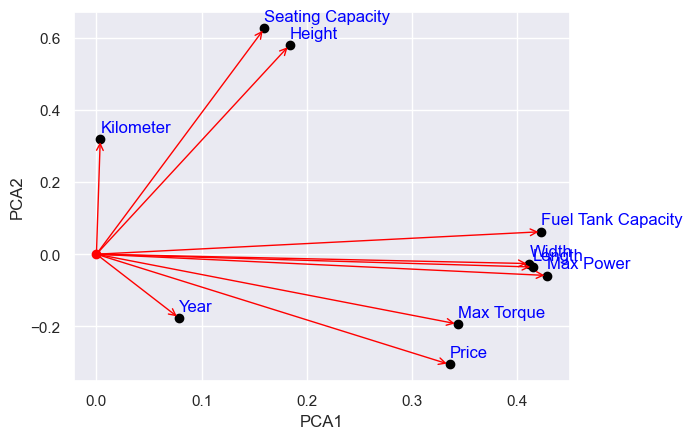

In [52]:
pca_plot(pca2, df2_2)

EV_CARS _INDIA.csv

In [54]:
df3 = pd.read_csv('EV_CARS _INDIA.csv')
df3.head()

,Brand Name,Battery Capacity(kWh),Acceleration(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Transmission,No. of Seats,Charging T(h),No. of Airbags,Drive Type,Price(Lh)
0,Audi RS e-tron GT,93.4,3.3,250,480,500,830,Automatic,5,9,Yes,AWD,204
1,Audi e-tron GT,93.4,4.1,245,500,523,630,Automatic,5,9,Yes,AWD,179
2,Audi e-tron,95.0,5.7,200,484,300,664,Automatic,5,9,Yes,AWD,123
3,Tata Nexon EV,30.2,9.9,180,312,96,245,Automatic,5,9,Yes,FWD,17
4,Tata Tigor EV,26.0,5.7,120,306,55,170,Automatic,5,9,Yes,FWD,14


In [55]:
df3.isna().sum().sum()

0

In [56]:
df3['No. of Airbags'].unique()

array(['Yes', 'No'], dtype=object)